<a href="https://colab.research.google.com/github/vignesh7-byte/DataMining/blob/main/ADM_LAB_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [12]:
np.random.seed(42)
data = np.random.normal(0, 1, 100)
outliers = np.random.uniform(5, 10, 5)
data_with_outliers = np.concatenate([data, outliers])

In [13]:
df = pd.DataFrame(data_with_outliers, columns=['Value'])

In [14]:
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [15]:
outliers_iqr = df[(df['Value'] < lower_bound) | (df['Value'] > upper_bound)]


In [16]:
z_scores = stats.zscore(df['Value'])
outliers_zscore = df[np.abs(z_scores) > 3]

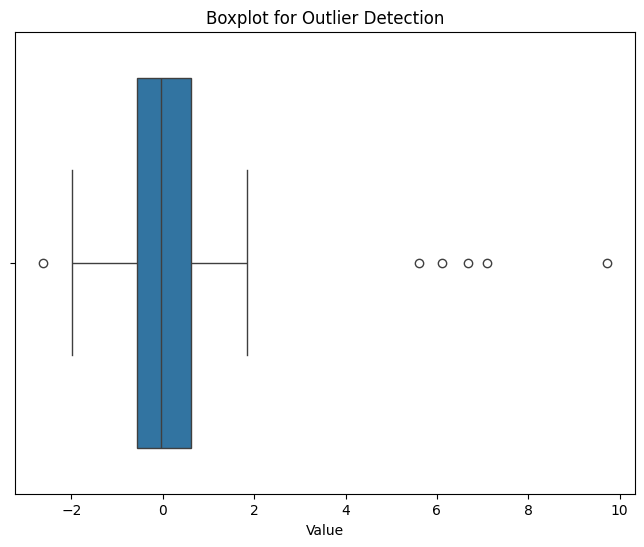

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Value'])
plt.title("Boxplot for Outlier Detection")
plt.show()


In [18]:
df_capped = df.copy()
df_capped['Value'] = np.clip(df_capped['Value'], lower_bound, upper_bound)


In [19]:
df_removed = df.copy()
df_removed = df_removed[(df_removed['Value'] >= lower_bound) & (df_removed['Value'] <= upper_bound)]


In [20]:
df_imputed = df.copy()
median_value = df['Value'].median()
df_imputed['Value'] = np.where((df_imputed['Value'] < lower_bound) | (df_imputed['Value'] > upper_bound),
                               median_value, df_imputed['Value'])


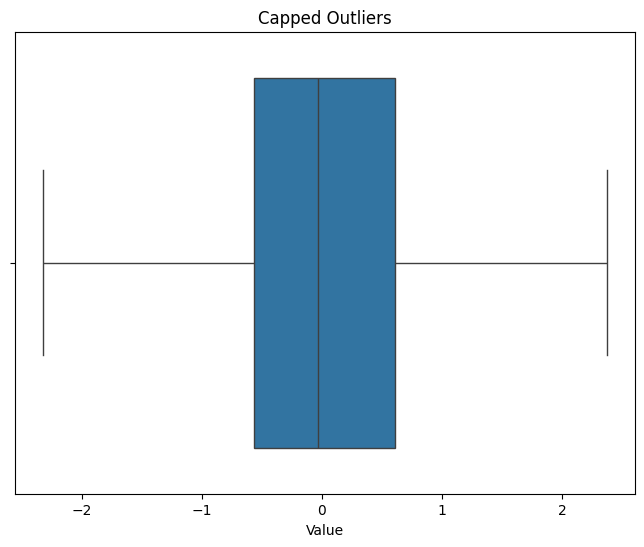

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_capped['Value'])
plt.title("Capped Outliers")
plt.show()


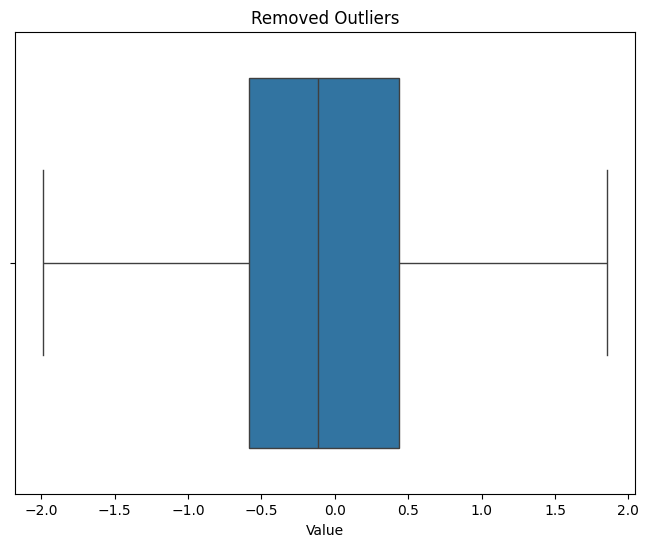

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_removed['Value'])
plt.title("Removed Outliers")
plt.show()

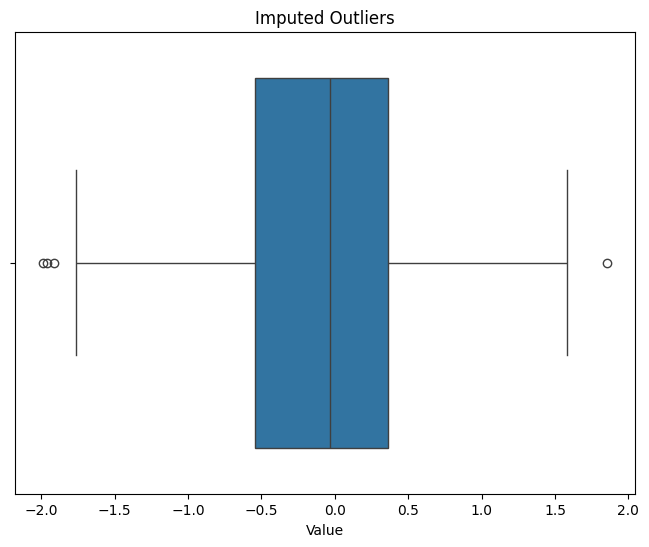

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_imputed['Value'])
plt.title("Imputed Outliers")
plt.show()


In [24]:
print(f"Outliers detected using IQR:\n{outliers_iqr}")
print(f"Outliers detected using Z-Score:\n{outliers_zscore}")


Outliers detected using IQR:
        Value
74  -2.619745
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549
Outliers detected using Z-Score:
        Value
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549
